In [64]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
ds = pd.read_csv("Food_Delivery_Time_Prediction (1).csv")
ds.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [66]:
#Encoding characteristic features
from sklearn.preprocessing import LabelEncoder
lEncoder = LabelEncoder()
for col in ['Traffic_Conditions', 'Weather_Conditions', 'Order_Priority', 'Order_Time', 'Vehicle_Type']:
    ds[col] = lEncoder.fit_transform(ds[col])
ds.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,2,4,2,0,2,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,0,2,8,1,3,2,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,2,9,0,3,1,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,0,1,2,2,1,1,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,0,6,1,3,1,3.5,2.8,32.38,619.81,2.34


In [67]:
#Normalizing features
from sklearn.preprocessing import Normalizer

N=Normalizer()

ds[['Distance','Delivery_Time','Order_Cost','Tip_Amount']]=N.fit_transform(ds[['Distance','Delivery_Time','Order_Cost','Tip_Amount']])

In [68]:
#Feature Engineering 
#removing unwanted features
ds = ds.drop(['Order_ID','Customer_Location','Restaurant_Location'],axis=1)


In [69]:
ds.head()

#Creating a catogry based on delivery time (1 for delayed 0 for fast)

meanTime = ds['Delivery_Time'].mean()

ds['Delivery Status'] = (ds['Delivery_Time']>meanTime).astype(int)

ds.head()

,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Delivery Status
0,0.001186,1,2,4,2,0,2,4.1,3.0,0.019806,0.997904,0.061592,0
1,0.126545,0,2,8,1,3,2,4.5,4.2,0.371623,0.903445,0.172249,1
2,0.004221,2,2,9,0,3,1,3.3,3.4,0.029416,0.998798,0.038977,0
3,0.024693,0,1,2,2,1,1,3.2,3.7,0.199888,0.969179,0.141872,1
4,0.010827,1,0,6,1,3,1,3.5,2.8,0.052167,0.998573,0.003770,0


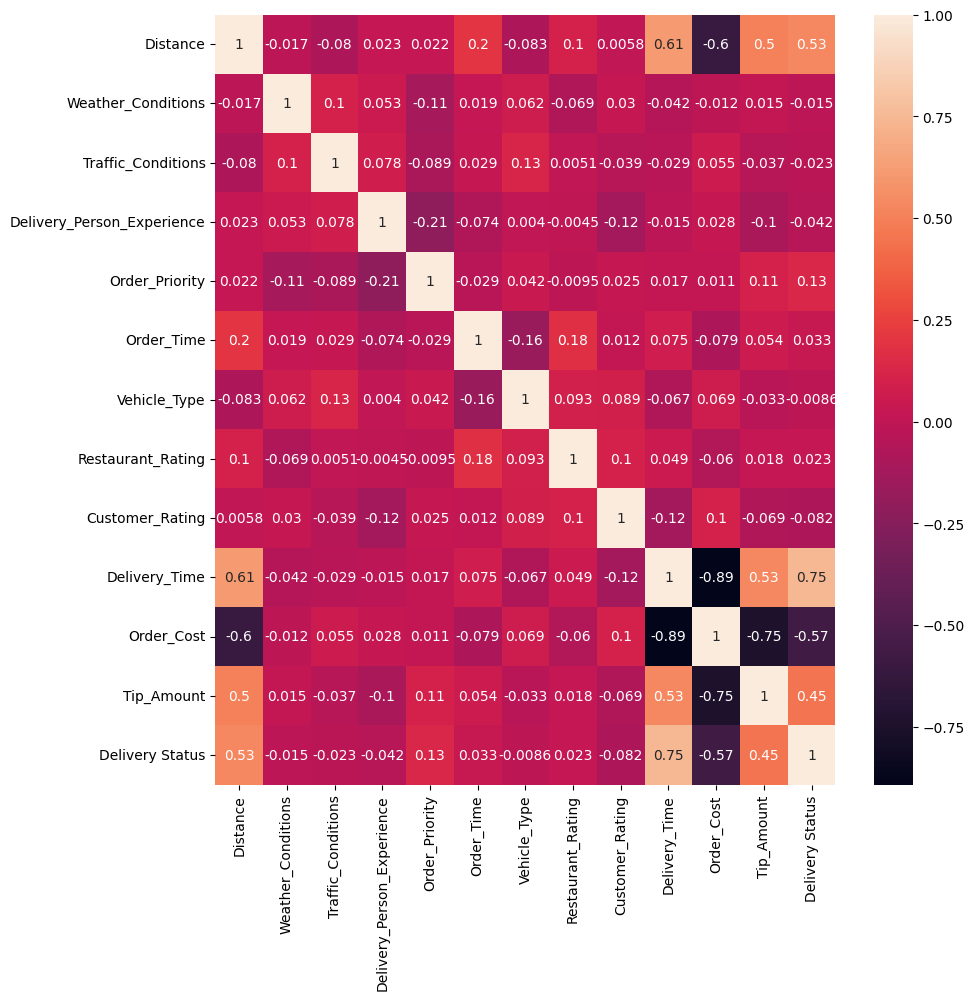

In [70]:
#Lets first find correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(ds.corr(numeric_only=True),annot=True)
plt.show()

Accuracy of model:  85.0
Precision of model:  93.75


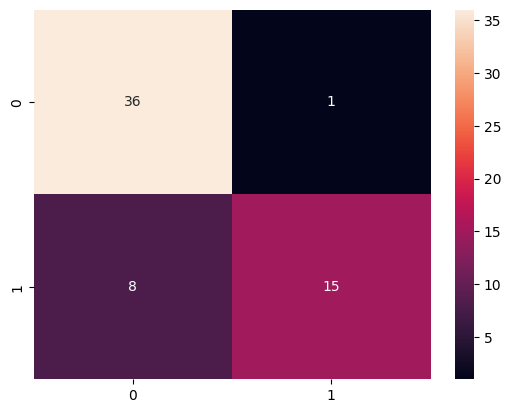

In [119]:
#Using correlation matrix getting features so using them as features

X=ds[['Distance', 'Order_Cost', 'Tip_Amount']]
Y=ds['Delivery Status']

#Splitting Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

#Making model
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
a=NB.fit(x_train,y_train)

#Predictions
y_predictNB = a.predict(x_test)

#Checking stats of model
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
print("Accuracy of model: ",accuracy_score(y_test,y_predictNB)*100)
print("Precision of model: ",precision_score(y_test,y_predictNB)*100)

#Making confusion matrix
sns.heatmap(confusion_matrix(y_test,y_predictNB),annot=True)
plt.show()

accuracy_score for k=1:  91.66666666666666
Precision_score for k=1:  95.0
accuracy_score for k=4:  91.66666666666666
Precision_score for k=4:  95.0


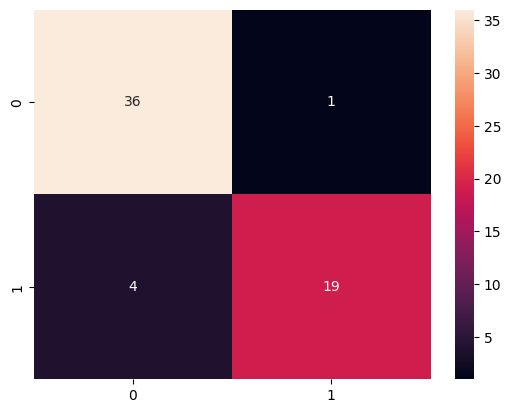

In [124]:
#Using KNN
#Will be using the same splitted data in KNN also
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn2 = KNeighborsClassifier(n_neighbors=4)

a = knn.fit(x_train,y_train)

y_predict1 = a.predict(x_test)

a2 = knn.fit(x_train,y_train)
y_predict2 = a2.predict(x_test)

#Getting stats for both of them
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

print("accuracy_score for k=1: ",accuracy_score(y_test,y_predict1)*100)
print("Precision_score for k=1: ",precision_score(y_test,y_predict1)*100)
print("accuracy_score for k=4: ",accuracy_score(y_test,y_predict2)*100)
print("Precision_score for k=4: ",precision_score(y_test,y_predict2)*100)
#As we can see both accuracy score is same so it does not matter which ever k value we take

#Making confusion matrix
sns.heatmap(confusion_matrix(y_test,y_predict1),annot=True)
plt.show()

accuracy_score for validation set:  97.61904761904762
accuracy_score for Test set:  96.66666666666667
Precision score for validation set:  100.0
Precision score for Test set:  100.0


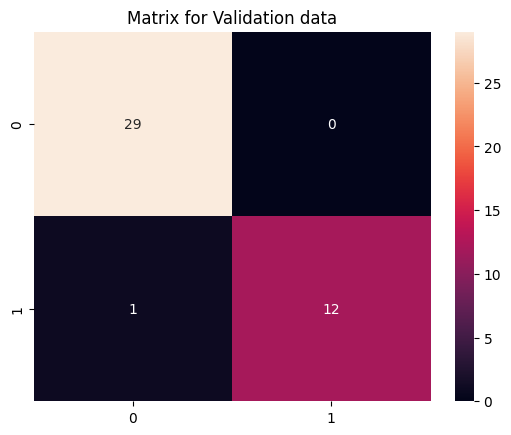

In [134]:
#Using Decision tree
#I will be using the same test and train splitted data but spliting it for validation
x_train2,x_validation,y_train2,y_validation = train_test_split(x_train,y_train,test_size=0.3)

#making model
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
a = dtree.fit(x_train2,y_train2)
#prediction of validation dataset
predict = a.predict(x_validation)

#Prediction of test data
predict2 = a.predict(x_test)

#Getting accuracy and other stats

from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

print("accuracy_score for validation set: ",accuracy_score(y_validation,predict)*100)
print("accuracy_score for Test set: ",accuracy_score(y_test,predict2)*100)

print("Precision score for validation set: ",precision_score(y_validation,predict)*100)
print("Precision score for Test set: ",precision_score(y_test,predict2)*100)

plt.title("Matrix for Validation data")
sns.heatmap(confusion_matrix(y_validation,predict),annot=True)

plt.show()



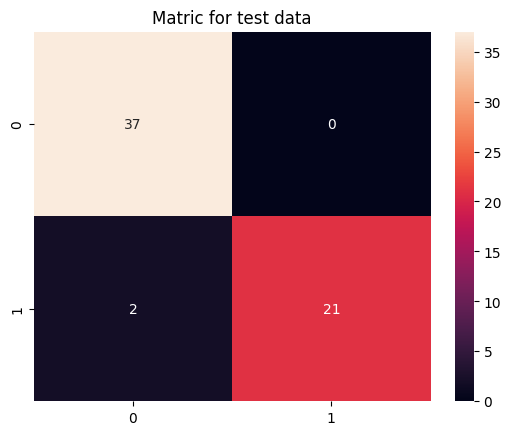

In [135]:
plt.title("Matric for test data")
sns.heatmap(confusion_matrix(y_test,predict2),annot=True)
plt.show()

In [ ]:
# ok so by comparing everything and confusion matrix we can see that every method is performing good but the best one is decision tree
#We can see that decision tree is not overfitted it is working good on both validation data and test data with highest accuracy.
